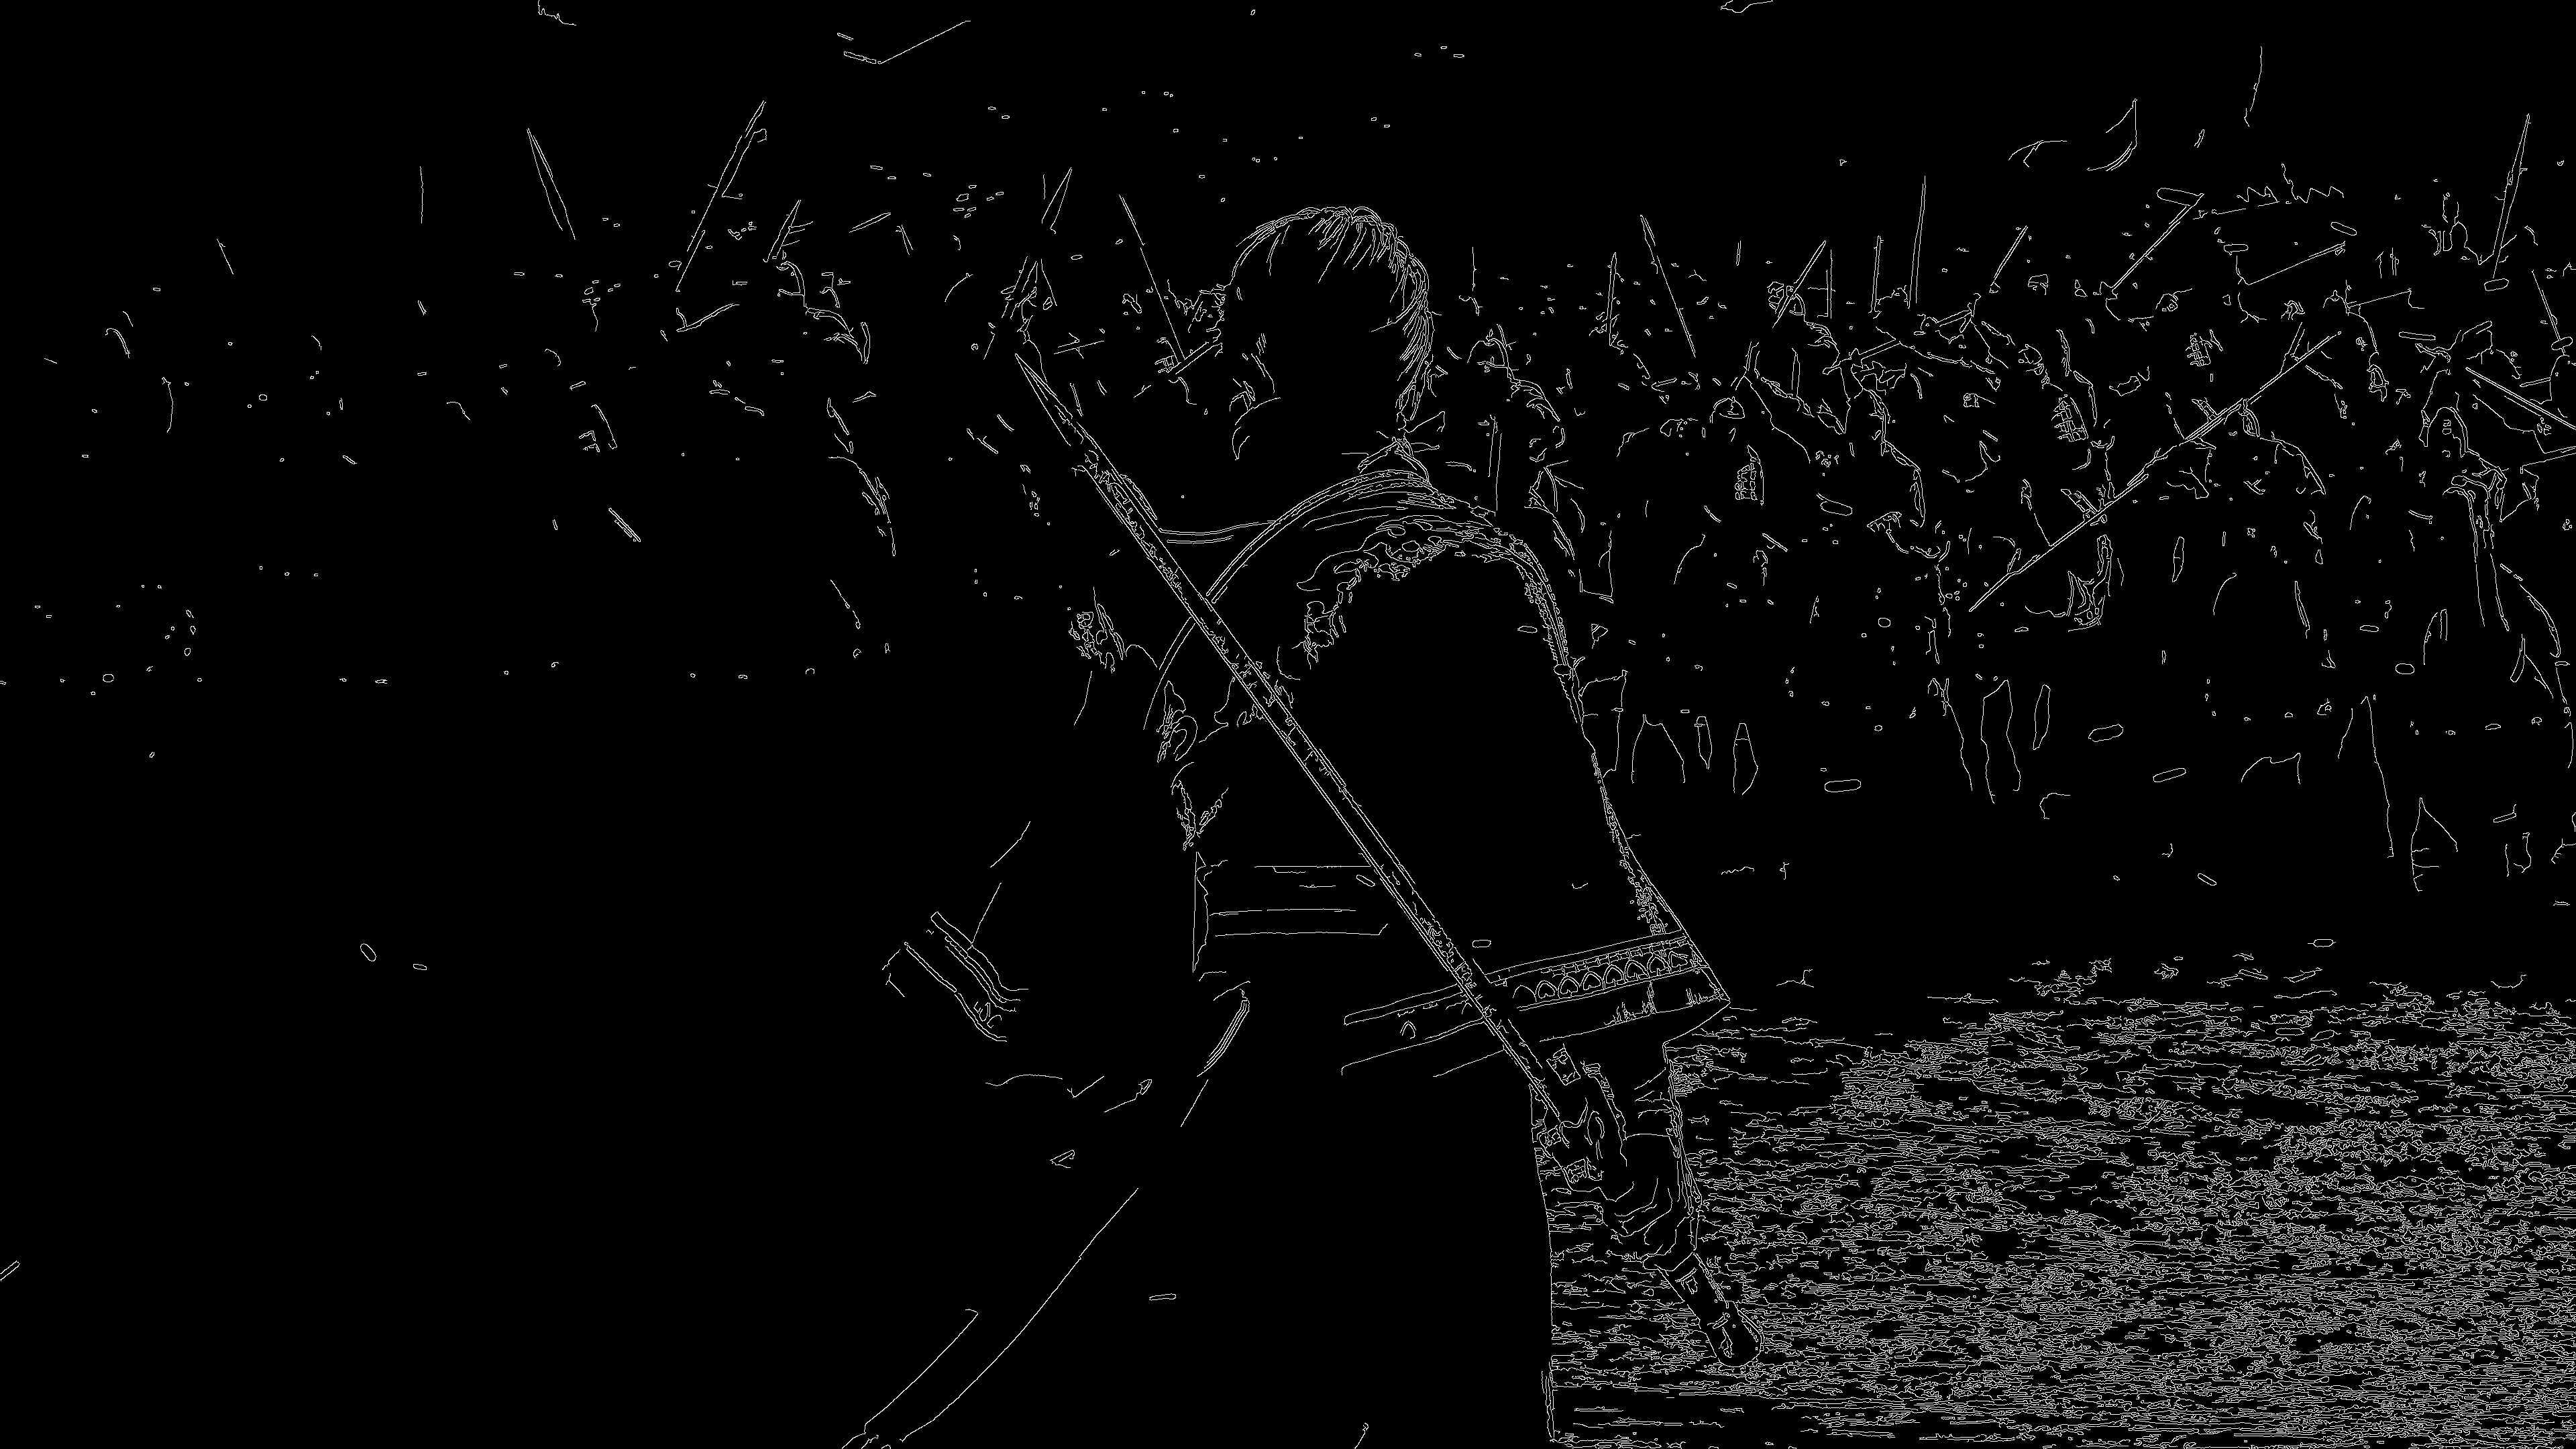

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


# Load image
image = cv2.imread('1.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Display edges
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

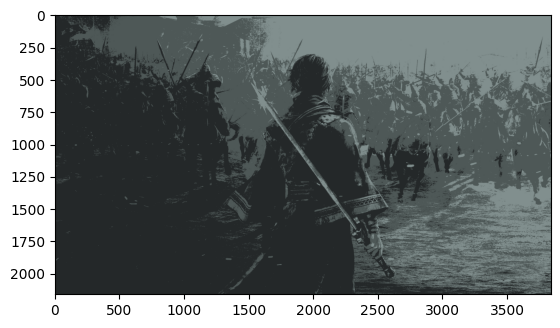

In [ ]:
# K-means clustering for region-based segmentation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Reshape image to a 2D array of pixels
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define K and apply K-means
k = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to 8-bit values
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Display segmented image
plt.imshow(segmented_image)
plt.show()

In [ ]:
# Detect lines using Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=68, minLineLength=15, maxLineGap=250)

# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Detect circles using Hough Transform
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0)

# Draw circles on the image
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        cv2.circle(image, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)

# Display the image with detected shapes
cv2.imshow('Shapes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
!pip install opencv-python ultralytics

In [ ]:
import cv2
from ultralytics import YOLO

# Load YOLO model
model = YOLO('yolov8n.pt')  # You can use other variants like yolov8s, yolov8m, etc.

# Perform object detection
results = model('road.jpg')

# Display results
results.show()

In [ ]:
!pip install torch torchvision

In [ ]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image

# Load pre-trained Faster RCNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load and preprocess image
image = Image.open('road.jpg')
image_tensor = F.to_tensor(image).unsqueeze(0)

# Perform object detection
with torch.no_grad():
    predictions = model(image_tensor)

# Display predictions
print(predictions)